In [1]:
import sys
sys.path.append('data_generation')
sys.path.append('util')
sys.path.append('neural_networks')
sys.path.append('experiments')

In [2]:
import tensorflow as tf
from dataset_manager import DataSetManager
from dataset import DataSetKey
from my_enums import Pricers,Generators
from ds_spec import DsSpecs
from experiment_manager import ExperimentManager
from my_config import Config
import os
from multiprocessing import Process
import time
import pandas as pd
import pickle
from metrics import Metrics
import matplotlib.pyplot as plt
import itertools

Not Running In Google Datalab
Not Running in Google Datalab


Load Dataset Manager and Experiment Manager (Connections to raw data, and trained networks)

In [4]:
dsm = DataSetManager.get_default_in_mem_DSM()

Loading DataSetKey(Generators.Uniform, Pricers.JuZhong, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Data\datasets\ds_0
Loading DataSetKey(Generators.Uniform, Pricers.Whaley, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Data\datasets\ds_1
Loading DataSetKey(Generators.Uniform, Pricers.JuZhongWhaley, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Data\datasets\ds_2
Loading DataSetKey(Generators.Halton, Pricers.JuZhong, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Data\datasets\ds_3
Loading DataSetKey(Generators.Halton, Pricers.Whaley, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Data\datasets\ds_4
Loading DataSetKey(Generators.Halton, Pricers.JuZhongWhaley, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Data\datasets\ds_5
Loading DataSetKey(Ge

In [5]:
em = ExperimentManager.create_or_load(os.path.join(Config.experiments_dir,'set1_nodropout'),dsm)

In [6]:
em_df = em.get_info_df()

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_0\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_1\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_2\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_3\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_4\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_5\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_59\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_60\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_61\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_62\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_63\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_64\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_65\model\model-50
INFO:tensorflow:Restoring parameters from C:\Use

In [7]:
em_df

,Generator,American Pricer,European Pricer,Specs,nodes,Activation Funcs,drop rates,epochs run,train_size,exp_dir
0,Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1,[5],[relu],[0],50,25000,C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\E...
1,Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1,[5],[leaky_relu],[0],50,25000,C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\E...
2,Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1,[5],[elu],[0],50,25000,C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\E...
3,Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1,[5],[sigmoid],[0],50,25000,C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\E...
4,Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1,[5],[tanh],[0],50,25000,C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\E...
...,...,...,...,...,...,...,...,...,...,...
85,Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1,"[20, 20]","[tanh, relu]","[0, 0]",50,25000,C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\E...
86,Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1,"[20, 20]","[tanh, leaky_relu]","[0, 0]",50,25000,C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\E...
87,Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1,"[20, 20]","[tanh, elu]","[0, 0]",50,25000,C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\E...
88,Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1,"[20, 20]","[tanh, sigmoid]","[0, 0]",50,25000,C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\E...


Compute $r^2$ for every possible architecture (all layers with all activations)

In [8]:
def get_arch_r2s(archs,dskey,learn_rate,train_size,epoch,exp_man):
    exps = [exp_man.get_exp(dskey,(arch,learn_rate),train_size) for arch in archs]
    r2s = [exp.get_metric(Metrics.r2,exp.get_outsample_data(1000),epoch) for exp in exps]
    return pd.DataFrame({'nodes':[tuple(n for n,af,dr in arch) for arch in archs],
                         'afs':[tuple(af.__name__ for n,af,dr in arch) for arch in archs],
                         'arch':archs,
                         'r2':r2s})

In [15]:
def get_layer_set_r2s(layer_nodes,afs,dskey,learn_rate,train_size,epoch,exp_man):
    af_sets = [tuple(j) for j in set(list(itertools.product(afs,repeat = len(layer_nodes))))]
    archs = [tuple(zip(layer_nodes,afs,tuple(0 for n in layer_nodes))) for afs in af_sets]
    return get_arch_r2s(archs,dskey,learn_rate,train_size,epoch,exp_man)

In [16]:
def get_all_r2s(layer_sets,afs,dskey,learn_rate,train_size,epoch,exp_man):
    dfs = [get_layer_set_r2s(layer_set,afs,dskey,learn_rate,train_size,epoch,exp_man)
           for layer_set in layer_sets]
    return pd.concat(dfs,axis=0).reset_index(drop=True)

In [17]:
dskey = DataSetKey(Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1)
learn_rate = 0.1
layer_sets = [(5,),(10,),(20,),(5,5),(10,10),(20,20)]
afs = [tf.nn.relu,tf.nn.leaky_relu,tf.nn.elu,tf.nn.sigmoid,tf.nn.tanh]
df = get_all_r2s(layer_sets,afs,dskey,learn_rate,25000,50,em)

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_4\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_0\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_3\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_1\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_2\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_9\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_5\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiq

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_50\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_54\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_42\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_62\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_69\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_65\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_85\model\model-50
INFO:tensorflow:Restoring parameters from C:\Use

In [18]:
df.drop(['arch'],axis=1)

,nodes,afs,r2
0,"(5,)","(tanh,)",70.571541
1,"(5,)","(relu,)",67.002449
2,"(5,)","(sigmoid,)",42.438877
3,"(5,)","(leaky_relu,)",66.093513
4,"(5,)","(elu,)",60.917294
...,...,...,...
85,"(20, 20)","(sigmoid, leaky_relu)",76.630737
86,"(20, 20)","(elu, relu)",93.085411
87,"(20, 20)","(elu, tanh)",92.126717
88,"(20, 20)","(relu, elu)",94.377617


Find the best activation funcs for each Layer Architecture

In [19]:
idx = df.groupby(['nodes'])['r2'].transform(max) == df['r2']
df[idx].drop(['arch'],axis=1)

,nodes,afs,r2
0,"(5,)","(tanh,)",70.571541
5,"(10,)","(tanh,)",75.556496
11,"(20,)","(relu,)",82.176933
17,"(5, 5)","(tanh, relu)",84.518524
55,"(10, 10)","(relu, leaky_relu)",92.113777
81,"(20, 20)","(tanh, leaky_relu)",95.184807


Plot the relationship between epochs and $r^2$ for the optimal architectures of each neuron setwork

In [22]:
df2 = df[idx].reset_index(drop=True)
epochs = list(range(1,51))
all_r2s = []
for i in range(df2.shape[0]):
    epoch_r2s = []
    model_key = (df2['arch'][i],learn_rate)
    exp = em.get_exp(dskey,model_key,25000)
    r2s = [exp.get_metric(Metrics.r2,exp.get_outsample_data(1000),epoch) for epoch in epochs]
    all_r2s.append(r2s)

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_4\model\model-1
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_4\model\model-2
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_4\model\model-3
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_4\model\model-4
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_4\model\model-5
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_4\model\model-6
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_4\model\model-7
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\De

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_9\model\model-12
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_9\model\model-13
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_9\model\model-14
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_9\model\model-15
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_9\model\model-16
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_9\model\model-17
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_9\model\model-18
INFO:tensorflow:Restoring parameters from C:\Users\Kaiq

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_10\model\model-23
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_10\model\model-24
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_10\model\model-25
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_10\model\model-26
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_10\model\model-27
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_10\model\model-28
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_10\model\model-29
INFO:tensorflow:Restoring parameters from C:\Use

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_35\model\model-34
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_35\model\model-35
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_35\model\model-36
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_35\model\model-37
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_35\model\model-38
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_35\model\model-39
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_35\model\model-40
INFO:tensorflow:Restoring parameters from C:\Use

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_41\model\model-45
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_41\model\model-46
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_41\model\model-47
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_41\model\model-48
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_41\model\model-49
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_41\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1_nodropout\exp_86\model\model-1
INFO:tensorflow:Restoring parameters from C:\User

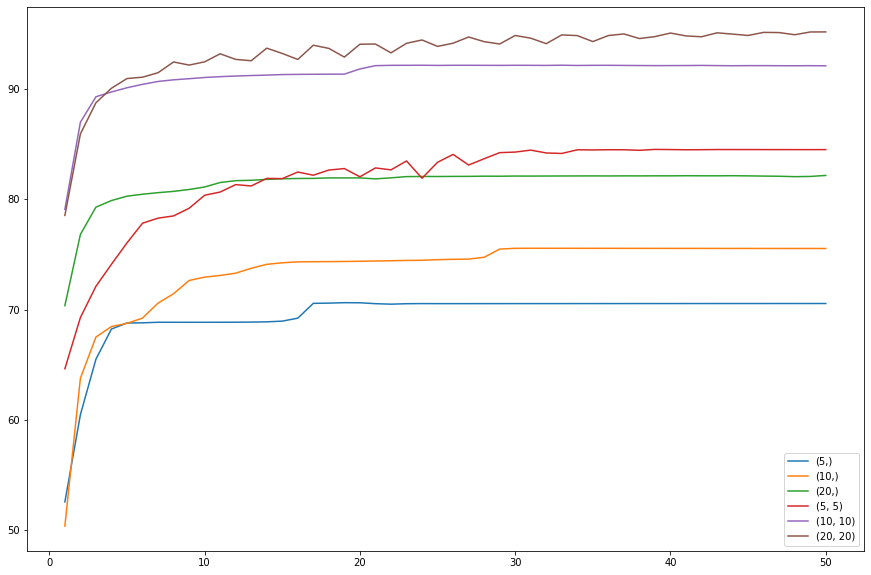

In [25]:
fig,axes = plt.subplots(1,1,figsize=(15,10))
layer_sets = [(5,),(10,),(20,),(5,5),(10,10),(20,20)]
#layer_axes = [axes[0][0],axes[1][0],axes[2][0],axes[0][1],axes[1][1],axes[2][1]]
for i in range(len(all_r2s)):
    axes.plot(epochs,all_r2s[i],label='{}'.format(layer_sets[i]))
axes.legend()